## Example 1 - Triangulation of arbitrary points on the sphere

`stripy` provides a python interfact to STRIPACK and SSRFPACK (Renka 1997a,b) as a triangulation class that would typically be used as follows:

``` python

import stripy as stripy
spherical_triangulation = stripy.sTriangulation(lons=vertices_lon_as_radians, lats=vertices_lat_as_radians)
s_areas = spherical_triangulation.areas()
```

The methods of the `sTriangulation` class include interpolation, smoothing and gradients (from SSRFPACK), triangle areas, point location by simplex and nearest vertex, refinement operations by edge or centroid, and neighbourhood search / distance computations through a k-d tree algorithm suited to points on the surface of a unit sphere. `stripy` also includes template triangulated meshes with refinement operations.

In this notebook we introduce the `sTriangulation` class itself.

#### Notebook contents

   - [Icosahedron](#Triangulate-the-vertices-of-an-icosahedron)
   - [Plotting on a map](#Making-a-plot-of-the-triangulation)
   - [3D visualisation](#Lavavu-to-view-spherical-information)
   - [Predefined meshes](#Predefined-meshes)

#### References



 
   1. Renka, R. J. (1997), Algorithm 772: STRIPACK: Delaunay triangulation and Voronoi diagram on the surface of a sphere, ACM Transactions on Mathematical Software (TOMS).
   
   2. Renka, R. J. (1997), Algorithm 773: SSRFPACK: interpolation of scattered data on the surface of a sphere with a surface under tension, ACM Transactions on Mathematical Software (TOMS), 23(3), 435–442, doi:10.1145/275323.275330.
   
   3. Renka, R. J. (1996), Algorithm 751; TRIPACK: a constrained two-dimensional Delaunay triangulation package, ACM Transactions on Mathematical Software, 22(1), 1–8, doi:10.1145/225545.225546.
   
   4. Renka, R. J. (1996), Algorithm 752; SRFPACK: software for scattered data fitting with a constrained surface under tension, ACM Transactions on Mathematical Software, 22(1), 9–17, doi:10.1145/225545.225547.


## Triangulate the vertices of an icosahedron

In [11]:
import stripy as stripy
import numpy as np

# Vertices of an icosahedron as Lat / Lon in degrees

vertices_LatLonDeg = np.array(
                               [[ 90,         0.0 ],
                                [ 26.57,      0.0 ],
                                [-26.57,     36.0 ],
                                [ 26.57,     72.0 ],
                                [-26.57,    108.0 ],
                                [ 26.57,    144.0 ],
                                [-26.57,    180.0 ],
                                [ 26.57,    360.0-72.0 ],
                                [-26.57,    360.0-36.0 ],
                                [ 26.57,    360.0-144.0 ],
                                [-26.57,    360.0-108.0 ],
                                [-90,         0.0 ]])


vertices_lat = np.radians(vertices_LatLonDeg.T[0])
vertices_lon = np.radians(vertices_LatLonDeg.T[1])

spherical_triangulation = stripy.sTriangulation(lons=vertices_lon, lats=vertices_lat)

This creates a triangulation object constructed using the wrapped fortran code of Renka (1997). The triangulation object has a number of 
useful methods and attached data which can be listed with

``` python

help(spherical_triangulation)
```


In [13]:
print(spherical_triangulation.areas())
print(spherical_triangulation.npoints)

[0.628217   0.628217   0.628217   0.628217   0.628217   0.62842006
 0.62842006 0.62842006 0.628217   0.628217   0.62842006 0.62842006
 0.628217   0.62842006 0.62842006 0.628217   0.62842006 0.62842006
 0.62842006 0.628217  ]
12


In [15]:
refined_spherical_triangulation = stripy.sTriangulation(lons=vertices_lon, lats=vertices_lat, refinement_levels=2)

print(refined_spherical_triangulation.npoints)

162


## Making a plot of the triangulation

We can make a plot of the two grids and the most straightforward way to display the information
is through a standard map projection of the sphere to the plane. 

(Here we superimpose the points on a global map of coastlines using the `cartopy` map library and use the Mollweide projection. 
 Other projections to try include `Robinson`, `Orthographic`, `PlateCarree`)

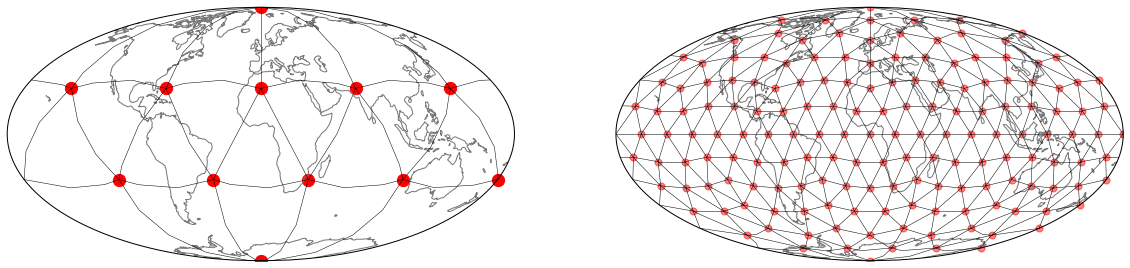

In [16]:
%matplotlib inline

import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(20, 10), facecolor="none")
    
ax  = plt.subplot(121, projection=ccrs.Mollweide(central_longitude=0.0, globe=None))
ax.coastlines(color="#777777")
ax.set_global()

ax2 = plt.subplot(122, projection=ccrs.Mollweide(central_longitude=0.0,  globe=None))
ax2.coastlines(color="#777777")
ax2.set_global()

## Plot the vertices and the edges for the original isocahedron

lons = np.degrees(spherical_triangulation.lons)
lats = np.degrees(spherical_triangulation.lats)

ax.scatter(lons, lats, color="Red",
                 marker="o", s=150.0, transform=ccrs.Geodetic())

segs = spherical_triangulation.identify_segments()

for s1, s2 in segs:
    ax.plot( [lons[s1], lons[s2]],
             [lats[s1], lats[s2]], 
              linewidth=0.5, color="black", transform=ccrs.Geodetic())


## Plot the vertices and the edges for the refined isocahedron

lons = np.degrees(refined_spherical_triangulation.lons)
lats = np.degrees(refined_spherical_triangulation.lats)

ax2.scatter(lons, lats, color="Red", alpha=0.5,
                 marker="o", s=50.0, transform=ccrs.Geodetic())


segs = refined_spherical_triangulation.identify_segments()

for s1, s2 in segs:
    ax2.plot( [lons[s1], lons[s2]],
              [lats[s1], lats[s2]], 
              linewidth=0.5, color="black", transform=ccrs.Geodetic())

## Predefined meshes

One common use of stripy is in meshing the sphere and, to this end, we provide pre-defined meshes for icosahedral and octahedral triangulations, each of which can have mid-face centroid points included. A triangulation of the six cube-vertices is also provided as well as a 'buckyball' (or 'soccer ball') mesh. A random mesh is included as a counterpoint to the regular meshes. Each of these meshes is also an sTriangulation.

The mesh classes in stripy are:

``` python
stripy.spherical_meshes.octahedral_mesh(include_face_points=False)
stripy.spherical_meshes.icosahedral_mesh(include_face_points=False)
stripy.spherical_meshes.triangulated_cube_mesh()
stripy.spherical_meshes.triangulated_soccerball_mesh()
stripy.spherical_meshes.uniform_ring_mesh(resolution=5)
stripy.spherical_meshes.random_mesh(number_of_points=5000)
```

Any of the above meshes can be uniformly refined by specifying the refinement_levels parameter.

``` python
spherical_triangulation         = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=0)
refined_spherical_triangulation = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=3)
```



In [17]:
import stripy as stripy

str_fmt = "{:35} {:3}\t{:6}"


## A bunch of meshes with roughly similar overall numbers of points / triangles

octo0  = stripy.spherical_meshes.octahedral_mesh(include_face_points=False, refinement_levels=0)
octo2  = stripy.spherical_meshes.octahedral_mesh(include_face_points=False, refinement_levels=2)
octoR  = stripy.spherical_meshes.octahedral_mesh(include_face_points=False, refinement_levels=5)

print(str_fmt.format("Octahedral mesh", octo0.npoints, octoR.npoints))


octoF0  = stripy.spherical_meshes.octahedral_mesh(include_face_points=True, refinement_levels=0)
octoF2  = stripy.spherical_meshes.octahedral_mesh(include_face_points=True, refinement_levels=2)
octoFR  = stripy.spherical_meshes.octahedral_mesh(include_face_points=True, refinement_levels=4)

print(str_fmt.format("Octahedral mesh with faces", octoF0.npoints, octoFR.npoints))


cube0 = stripy.spherical_meshes.triangulated_cube_mesh(refinement_levels=0)
cube2 = stripy.spherical_meshes.triangulated_cube_mesh(refinement_levels=2)
cubeR = stripy.spherical_meshes.triangulated_cube_mesh(refinement_levels=5)

print(str_fmt.format("Cube mesh", cube0.npoints, cubeR.npoints))


ico0 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=0)
ico2 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=2)
icoR = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=4)

print(str_fmt.format("Icosahedral mesh", ico0.npoints, icoR.npoints))


icoF0 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=0, include_face_points=True)
icoF2 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=2, include_face_points=True)
icoFR = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=4, include_face_points=True)

print(str_fmt.format("Icosahedral mesh with faces", icoF0.npoints, icoFR.npoints))


socc0 = stripy.spherical_meshes.triangulated_soccerball_mesh(refinement_levels=0)
socc2 = stripy.spherical_meshes.triangulated_soccerball_mesh(refinement_levels=1)
soccR = stripy.spherical_meshes.triangulated_soccerball_mesh(refinement_levels=3)

print(str_fmt.format("BuckyBall mesh", socc0.npoints, soccR.npoints))


## Need a reproducible hierarchy ... 
ring0 = stripy.spherical_meshes.uniform_ring_mesh(resolution=5, refinement_levels=0)

lon, lat = ring0.uniformly_refine_triangulation()
ring1 = stripy.sTriangulation(lon, lat)

lon, lat = ring1.uniformly_refine_triangulation()
ring2 = stripy.sTriangulation(lon, lat)

lon, lat = ring2.uniformly_refine_triangulation()
ring3 = stripy.sTriangulation(lon, lat)

lon, lat = ring3.uniformly_refine_triangulation()
ringR = stripy.sTriangulation(lon, lat)


# ring2 = stripy.uniform_ring_mesh(resolution=6, refinement_levels=2)
# ringR = stripy.uniform_ring_mesh(resolution=6, refinement_levels=4)

print(str_fmt.format("Ring mesh (9)", ring0.npoints, ringR.npoints))

randR = stripy.spherical_meshes.random_mesh(number_of_points=5000)
rand0 = stripy.sTriangulation(lons=randR.lons[::50],lats=randR.lats[::50])
rand2 = stripy.sTriangulation(lons=randR.lons[::25],lats=randR.lats[::25])

print(str_fmt.format("Random mesh (6)", rand0.npoints, randR.npoints))


Octahedral mesh                       6	  4098
Octahedral mesh with faces           14	  3074
Cube mesh                             8	  6146
Icosahedral mesh                     12	  2562
Icosahedral mesh with faces          32	  7682
BuckyBall mesh                       92	  5762
Ring mesh (9)                        30	  7170
Random mesh (6)                     100	  5000


### Plot and compare the predefined meshes 


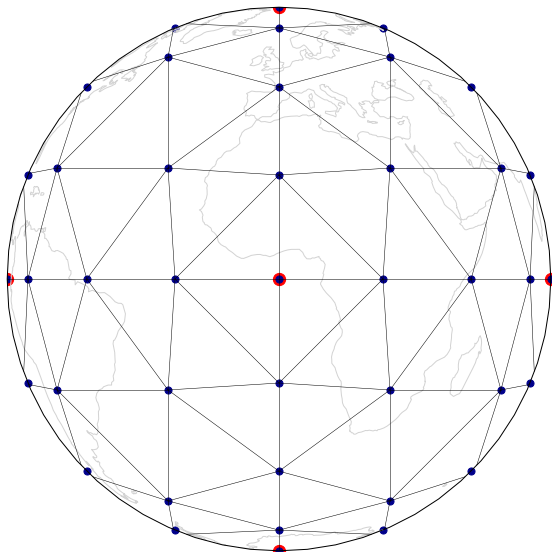

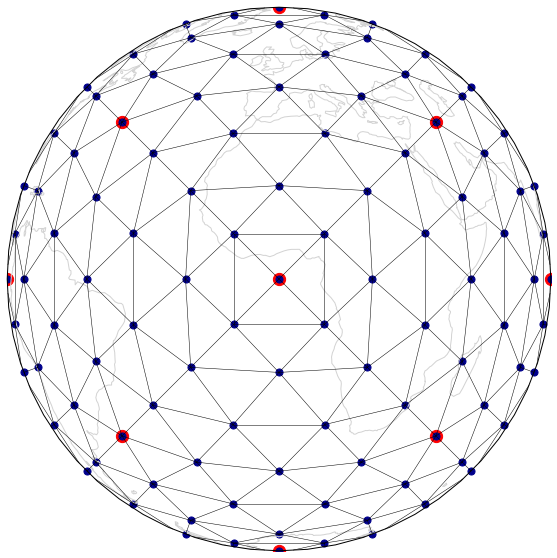

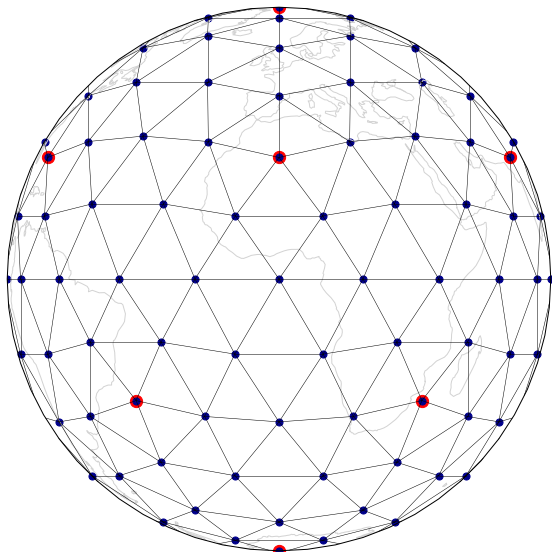

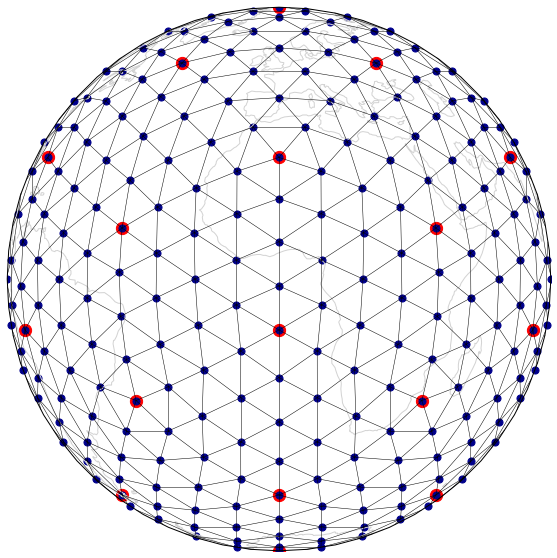

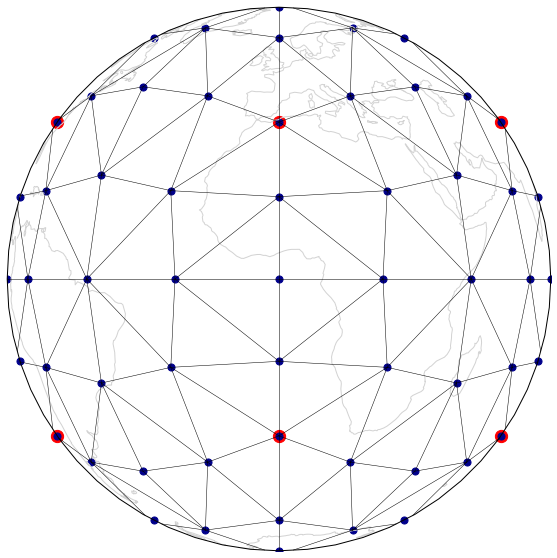

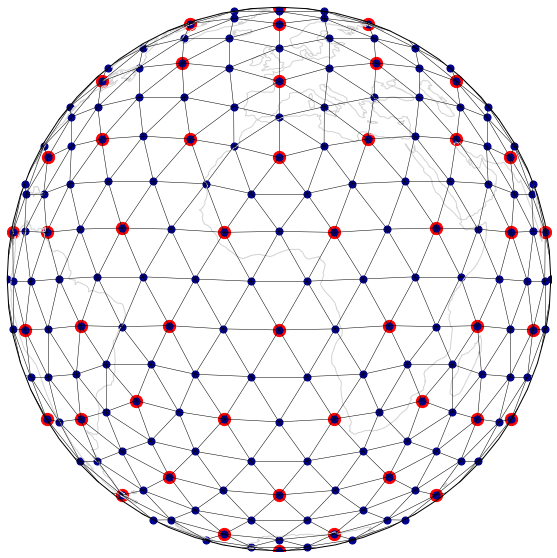

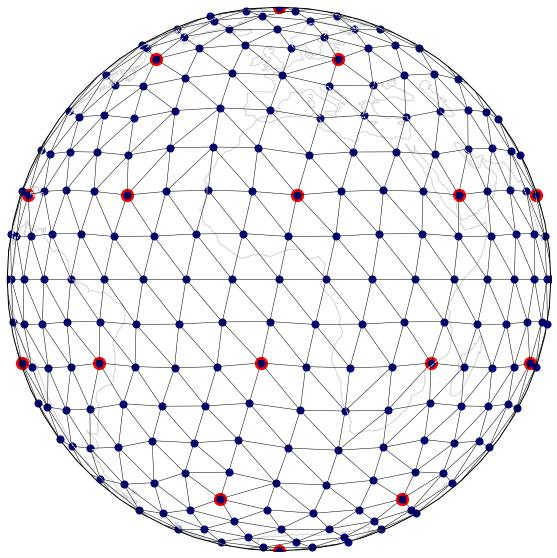

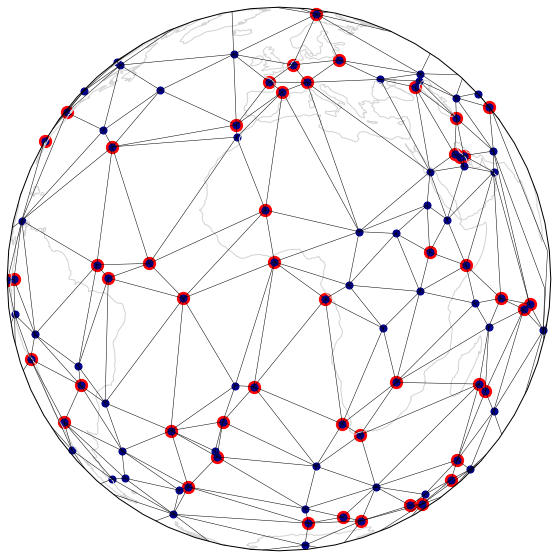

In [18]:
def mesh_fig(mesh, meshR, name):

    fig = plt.figure(figsize=(10, 10), facecolor="none")
    ax  = plt.subplot(111, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0, globe=None))
    ax.coastlines(color="lightgrey")
    ax.set_global()

    generator = mesh
    refined   = meshR

    lons0 = np.degrees(generator.lons)
    lats0 = np.degrees(generator.lats)

    lonsR = np.degrees(refined.lons)
    latsR = np.degrees(refined.lats)

    lst = refined.lst
    lptr = refined.lptr


    ax.scatter(lons0, lats0, color="Red",
                marker="o", s=150.0, transform=ccrs.Geodetic())

    ax.scatter(lonsR, latsR, color="DarkBlue",
                marker="o", s=50.0, transform=ccrs.Geodetic())

    
    segs = refined.identify_segments()

    for s1, s2 in segs:
        ax.plot( [lonsR[s1], lonsR[s2]],
                 [latsR[s1], latsR[s2]], 
                 linewidth=0.5, color="black", transform=ccrs.Geodetic())

    fig.savefig(name, dpi=250, transparent=True)
    
    return

mesh_fig(octo0,  octo2, "Octagon" )
mesh_fig(octoF0, octoF2, "OctagonF" )

mesh_fig(ico0, ico2, "Icosahedron" )
mesh_fig(icoF0, icoF2, "IcosahedronF" )

mesh_fig(cube0, cube2, "Cube")
mesh_fig(socc0, socc2, "SoccerBall")

mesh_fig(ring0, ring2, "Ring")
mesh_fig(rand0, rand2, "Random")



